In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
dfcp = pd.read_csv('Company_Profiler.csv')

In [0]:
df = pd.read_csv('all.csv')

D:\Pyplatform\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
dfcp.head()

,KF_ID,Number of Data Points for Each Company,Number of Years We Have Information,IndustryName,IndustrySegmentName
0,1,8,1,['Financials'],['Consumer Finance']
1,2,14058,7,"['Consumer Services', 'Retail (Services)']","['Specialized Consumer Services', 'unknown']"
2,3,87477,10,"['Consumer Goods', 'Fast Moving Consumer Goods...","['Household and Personal Care', 'unknown']"
3,4,30390,10,"['Retailers (Services)', 'Consumer Services', ...","['unknown', 'Food Retailers and Wholesalers']"
4,5,77,2,['Industrials'],"['Transportation Infrastructure', 'Road and Ra..."


In [0]:
kf_id = 4

In [0]:
df_id = df[(df['KF_ID'] == kf_id)]
df_id.reset_index(drop=True,inplace=True)

In [0]:
# Analyze positions of a company
def jobs_of_company(dataf):
    jb = {}
    for i in range(len(dataf)):
        if dataf['KF_ID'][i] not in jb.keys():
            aa = {}
            aa[dataf['JobName'][i]] = [dataf['CalendarYear'][i]]
            jb[dataf['KF_ID'][i]] = aa
        else:
            if dataf['JobName'][i] not in jb[dataf['KF_ID'][i]].keys():
                jb[dataf['KF_ID'][i]][dataf['JobName'][i]] = [dataf['CalendarYear'][i]]
            else:
                if dataf['CalendarYear'][i] not in jb[dataf['KF_ID'][i]][dataf['JobName'][i]]:
                    jb[dataf['KF_ID'][i]][dataf['JobName'][i]].append(dataf['CalendarYear'][i])
    job_list = pd.DataFrame(jb)
    for j in job_list.values:
        j[0].sort()
    return job_list

In [0]:
# Remuneration of Overall Job
def remuneration_of_job(dataf,salary_column_name):
    roj = {}
    for i in range(len(dataf)):
        if dataf['CalendarYear'][i] not in roj.keys():
            roj[dataf['CalendarYear'][i]] = dataf[salary_column_name][i]
        else:
            roj[dataf['CalendarYear'][i]] += dataf[salary_column_name][i]
    return roj

In [0]:
kf_id = 3

In [0]:
# Number of records/data points for the company
print("Number of records/data points for the company:",dfcp['Number of Data Points for Each Company'][kf_id-1])

Number of records/data points for the company: 30390


In [0]:
# Number of years for which we have the data
print("Number of years for which we have the data:",dfcp['Number of Years We Have Information'][kf_id-1])

Number of years for which we have the data: 10


In [0]:
# IndustryName of the company
print("Industry name of the company:",dfcp['IndustryName'][kf_id-1])

Industry name of the company: ['Retailers (Services)', 'Consumer Services', 'Retail (Services)']


In [0]:
# IndustrySegmentName of the company
print("Industry Segment Name of the company:",dfcp['IndustrySegmentName'][kf_id-1])

Industry Segment Name of the company: ['unknown', 'Food Retailers and Wholesalers']


In [0]:
# number of unique jobs 
job_list = jobs_of_company(df_id)
print("The Number of Unique Jobs :",len(job_list))
job_list.head(10)

The Number of Unique Jobs : 351


,4
Accountant I,"[2016, 2018]"
Accountant I - 1008,[2010]
Accountant II,"[2012, 2013, 2014, 2016, 2018]"
Accountant II - 1007,"[2008, 2009, 2011]"
Accountant III,"[2012, 2013, 2014, 2016, 2018]"
Accountant III - 1005,"[2008, 2009, 2010, 2011]"
Accountant IV,"[2012, 2013, 2014, 2016]"
Accountant IV - 1004,"[2008, 2009, 2010, 2011]"
Accounting Clerk II,[2018]
Accounting Clerk II - 1011,[2011]


Year we have information: ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2018']
Total salary for each year: [142752393.0, 141160318.0, 121720751.0, 207148296.0, 148847664.0, 117111316.0, 91102768.0, 9910376.0, 265438543.0, 218374038.0]


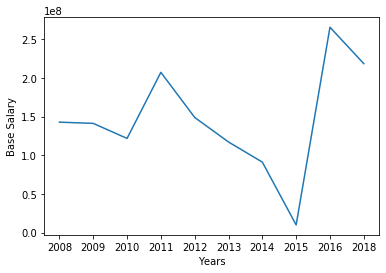

In [0]:
# Explore overall salary trends for the company. You can choose whatever salary value you want to plot. Like "Base Salary","Total Remuneration"
aaa = remuneration_of_job(df_id,"Base Salary")
ccc = sorted(aaa.items(), key=lambda e:e[0], reverse=False)
ddd = pd.DataFrame(ccc)
ddd.rename(columns = {0:"year",1:"Base Salary"},inplace = True)
ddd.head(10)
calenyear = []
totalremu = []
for i in range(len(ccc)):
    calenyear.append(str(ccc[i][0]))
    totalremu.append(ccc[i][1])
print("Year we have information:",calenyear)
print("Total salary for each year:",totalremu)
plt.plot(calenyear,totalremu)
plt.xlabel('Years')
plt.ylabel('Base Salary')
plt.show()

In [0]:
# 3-b Explore them at a Job level instead of an overall level as well. (maybe a good visualization will help)
# salary on job level
# input parameter salary_column_name is the column that user wants to look at
#   e.g. total annual remuneration, base salary, etc
# output: a dataframe, first column: company id
#                      second column: job name
#                      third column: calendar year
#                      forth column: average salary
def salary_job_by_year(dataf, kf_id, job_name, salary_column_name):
    df = dataf[dataf['KF_ID'] == kf_id][['KF_ID','JobName', salary_column_name, 'CalendarYear']]
    output = df.groupby(['KF_ID','JobName', 'CalendarYear']).mean().reset_index()
    return output.loc[(output['JobName'] == job_name)]

In [0]:
# for example
kf_id = 4
job_name = 'Store Manager I - 1385'
salary_column_name = 'Base Salary'
output = salary_job_by_year(df, kf_id, job_name, salary_column_name)

In [0]:
# to plot:
years = [str(year) for year in list(output['CalendarYear'])]
salary = list(output['Base Salary'])
plt.plot(years,salary)
plt.xlabel('year')
plt.ylabel('average salary')
plt.show()

NameError: name 'job_name' is not defined

3-c Explore differences in salary between different levels of employees. Does the CEO earn 10 times a normal worker?

For 3-c, start off by selecting a skill level variable. This can be either ReferenceLevelNum or IncumbemtPointCount. Make sure that your code allows the user to select either of the skill variable.

Now what we need to check is the salary values associated with different skill level. One possible option is to split the skill variable into buckets and then calculate the mean/median salary variable for that bucket.

For eg, you take IncumbentPointCount as the skill variable. You see that for the specific company, the variable varies from 20-120. Then you can probably create 10 buckets of 20-30, 30-40 and so on. For each bucket, calculate the mean/median of the salary variable.

Here salary variable can be any variable that the user wishes to explore. So let your code be flexible enough to accept either Total Cash or Total Remuneration or Base Salary.

Next stage you dont have to do this now

In the next stage, we try to establish a more a concrete relationship between skill and salary for a company. One of the ways to do that is to model for salary using skill level. We ultimately need an equation like: Salary = askill + bskill^2 + c*skill^3 + intercept

We shall discuss this further in your next task.

In [0]:
# salary on job level
# input parameter: salary_column_name is the column that user wants to look at
#   e.g. total annual remuneration, base salary, etc
# input parameter mean: if mean is True, return average,
#                   else, return median
# input parameter bins: if bins is 0, the first column is raw level number,
#                   else, divide the level number into bins
# output: a dataframe, first column: job level name
#                      second column: mean/median salary for that level
def salary_by_level(dataf, kf_id, level_column_name, salary_column_name, mean = True, bins = 0):
    df = dataf[dataf['KF_ID'] == kf_id][[salary_column_name, level_column_name]]
    if mean:
        output = df.groupby([level_column_name]).mean().reset_index()
    else:
        output = df.groupby([level_column_name]).median().reset_index()
    if bins > 0:
        low = min(output[level_column_name])
        high = max(output[level_column_name])
        interval = (high - low)/bins
        curr = low + interval
        curr_bin = 0
        new_output = np.zeros([bins, 2])
        total = 0
        count = 0
        for i in range(len(output)):
            if output.iloc[i, 0] < curr:
                total += output.iloc[i, 1]
                count += 1
            else:
                if count > 0:
                    new_output[curr_bin, 1] = total/count
                total = 0
                count = 0
                while output.iloc[i, 0] > curr:
                    curr += interval
                    curr_bin += 1
                    new_output[curr_bin, 0] = curr_bin
                total += output.iloc[i, 1]
                count += 1
        return pd.DataFrame(new_output, columns = ['bin', salary_column_name])
                
    return output

In [0]:
# for example:
# all outputs have 2 columns
# first column is job level that we are interested in, raw or bin number
# output0 has the first column as bin number for ReferenceLevelNum
# (as user specified, there are 10 bins, so there are 10 rows)
# second column is mean salary (based on user input salary_column_name) given the specific level

# output1 has the first column as raw ReferenceLevelNum
# second column is median salary (based on user input salary_column_name) given the specific level

# output1 has the first column as raw IncumbentPointCount
# second column is mean salary (based on user input salary_column_name) given the specific level


kf_id = 4
level_column_name = 'ReferenceLevelNum'
salary_column_name = 'Base Salary'
output0 = salary_by_level(df, kf_id, level_column_name, salary_column_name, True, 10)
output1 = salary_by_level(df, kf_id, level_column_name, salary_column_name, False)

level_column_name = 'IncumbentPointCount'
output2 = salary_by_level(df, kf_id, level_column_name, salary_column_name)